In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thr Jul 31 2022
Adapted from: https://github.com/mrc-ide/Brazil_COVID19_distributions

@author: dsquevedo
@author: ntorres
"""

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('../../plot_scripts/plot_style.mplstyle')

In [2]:
DATA_PATH = '../data/'
OUT_PATH = '../figures/'
RESULTS_PATH = '../results/'

strat = 'wave'

In [3]:
df_hosp_perc = pd.read_csv(RESULTS_PATH + 'hosp_percentages.csv')
df_icu_perc = pd.read_csv(RESULTS_PATH + 'icu_percentages.csv')
df_death_perc = pd.read_csv(RESULTS_PATH + 'deaths_percentages.csv')

df_hosp_perc['wave'] = df_hosp_perc['wave'].astype(int)
df_icu_perc['wave'] = df_icu_perc['wave'].astype(int)
df_death_perc['wave'] = df_death_perc['wave'].astype(int)

In [4]:
def plot_xyvar(df, ax, n_strat, varx='age_group', vary='percentage', title=None):
    data = df.loc[df[strat]==n_strat]
    ax.plot(data[varx], data[vary], label=strat+str(n_strat), linestyle='-', marker='o')
    ax.set_title(title)

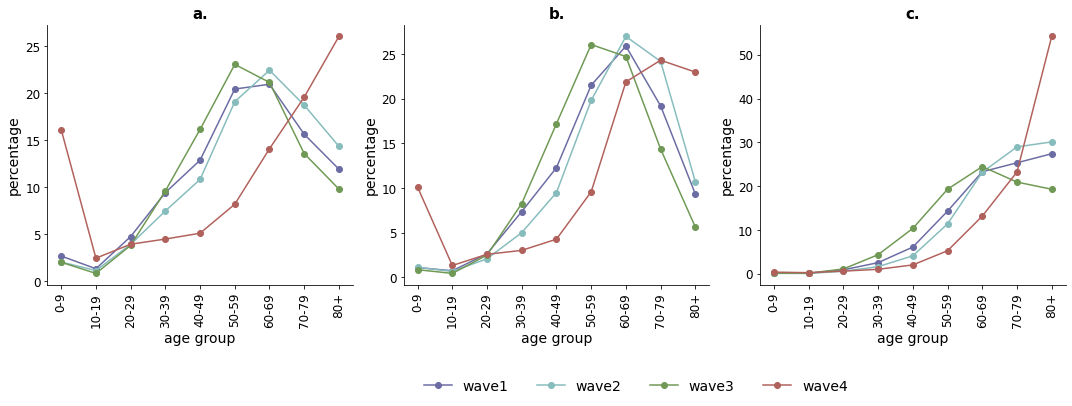

In [5]:
wave_list = df_hosp_perc['wave'].unique()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

vary = 'percentage'
for axi in ax:
    axi.tick_params(axis='x', labelrotation=90)
    axi.set_ylabel(vary)
    axi.set_xlabel('age group')

for wave in wave_list:
    plot_xyvar(df_hosp_perc, ax=ax[0], n_strat=wave, vary=vary, title='a.')
    plot_xyvar(df_icu_perc, ax=ax[1], n_strat=wave, vary=vary, title='b.')
    plot_xyvar(df_death_perc, ax=ax[2], n_strat=wave, vary=vary, title='c.')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.8, -0.03), ncol = len(wave_list))    
fig.show()
fig.savefig(OUT_PATH+'hosp_icu_death_percentages.png')

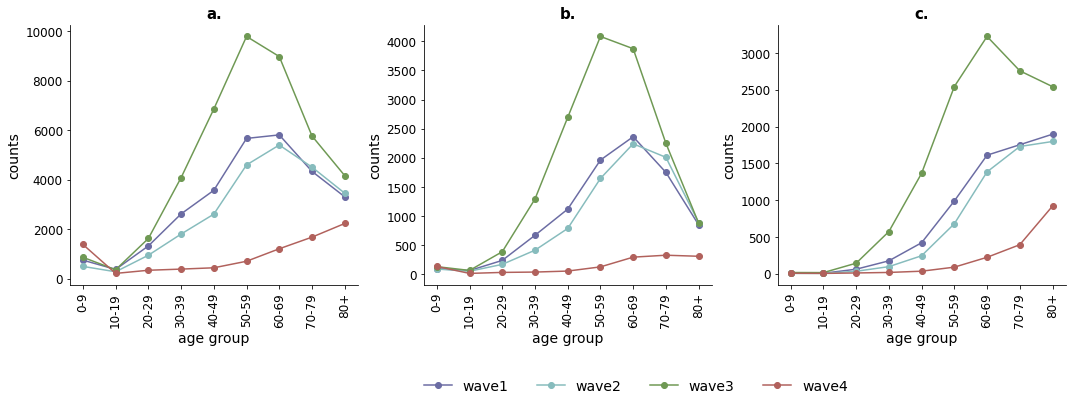

In [6]:
wave_list = df_hosp_perc['wave'].unique()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

vary = 'counts'
for axi in ax:
    axi.tick_params(axis='x', labelrotation=90)
    axi.set_ylabel(vary)
    axi.set_xlabel('age group')

for wave in wave_list:
    plot_xyvar(df_hosp_perc, ax=ax[0], n_strat=wave, vary=vary, title='a.')
    plot_xyvar(df_icu_perc, ax=ax[1], n_strat=wave, vary=vary, title='b.')
    plot_xyvar(df_death_perc, ax=ax[2], n_strat=wave, vary=vary, title='c.')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.8, -0.03), ncol = len(wave_list))    
fig.show()
fig.savefig(OUT_PATH+'hosp_icu_death_counts.png')

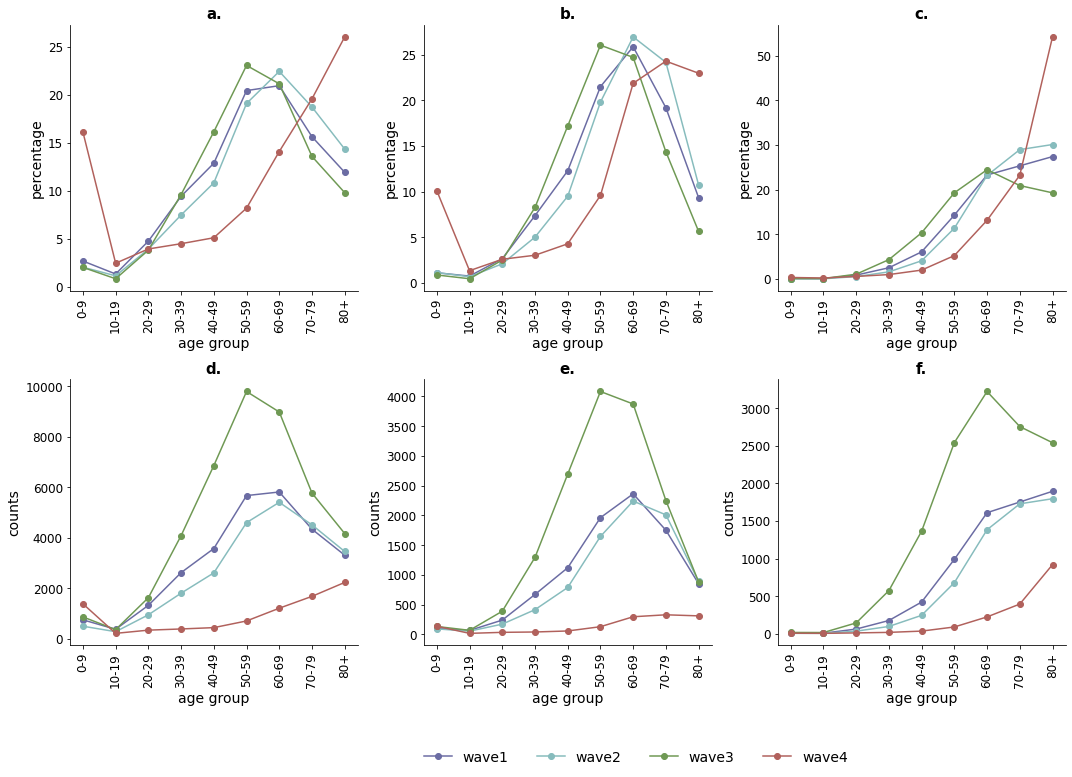

In [7]:
wave_list = df_hosp_perc['wave'].unique()
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

vary = 'percentage'
for axi in ax[0]:
    axi.tick_params(axis='x', labelrotation=90)
    axi.set_ylabel(vary)
    axi.set_xlabel('age group')

for wave in wave_list:
    plot_xyvar(df_hosp_perc, ax=ax[0][0], n_strat=wave, vary=vary, title='a.')
    plot_xyvar(df_icu_perc, ax=ax[0][1], n_strat=wave, vary=vary, title='b.')
    plot_xyvar(df_death_perc, ax=ax[0][2], n_strat=wave, vary=vary, title='c.')

vary = 'counts'
for axi in ax[1]:
    axi.tick_params(axis='x', labelrotation=90)
    axi.set_ylabel(vary)
    axi.set_xlabel('age group')

for wave in wave_list:
    plot_xyvar(df_hosp_perc, ax=ax[1][0], n_strat=wave, vary=vary, title='d.')
    plot_xyvar(df_icu_perc, ax=ax[1][1], n_strat=wave, vary=vary, title='e.')
    plot_xyvar(df_death_perc, ax=ax[1][2], n_strat=wave, vary=vary, title='f.')    
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.8, -0.03), ncol = len(wave_list))    
fig.show()
fig.savefig(OUT_PATH+'hosp_icu_death_percentages_counts.png')